<a href="https://colab.research.google.com/github/satwiksps/Deep-Learning/blob/main/04_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Load dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
# Normalize data
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
# Reshape data
X_train=X_train.reshape((X_train.shape[0],28,28,1))
X_test=X_test.reshape((X_test.shape[0],28,28,1))
# One - hot encode labels
Y_train=to_categorical(Y_train,10)
Y_test=to_categorical(Y_test,10)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Initialize the Sequential model
model = Sequential([
    # Add a Conv2D layer with 32 filters, each of size 3x3, using ReLU activation
    # Input shape is (28, 28, 1) which represents 28x28 grayscale images
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Add a MaxPooling layer with a pool size of 2x2 to downsample the feature maps
    MaxPooling2D((2, 2)),
    # Add another Conv2D layer with 64 filters, each of size 3x3, using ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Add another MaxPooling layer with a pool size of 2x2
    MaxPooling2D((2, 2)),
    # Flatten the 2D feature maps into a 1D feature vector
    Flatten(),
    # Add a Dense (fully connected) layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    # Add the output Dense layer with 10 units (one for each class) and softmax activation
    Dense(10, activation='softmax')
])

# Line 3: Compiling the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer
    loss='categorical_crossentropy',  # Loss function: Categorical cross-entropy
    metrics=['accuracy']  # Metrics: Accuracy
)

# Line 4: Training the model
history = model.fit(
    X_train,  # Training data features
    Y_train,  # Training data labels
    epochs=50,  # Number of epochs (iterations over the entire dataset)
    validation_split=0.2,  # Fraction of training data to be used as validation data
    batch_size=64  # Number of samples per gradient update
)

Epoch 1/50
750/750 [==============================] - 8s 5ms/step - loss: 0.2025 - accuracy: 0.9399 - val_loss: 0.0883 - val_accuracy: 0.9727
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0490 - val_accuracy: 0.9859
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0606 - val_accuracy: 0.9816
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0380 - val_accuracy: 0.9896
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0407 - val_accuracy: 0.9897
Epoch 

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.9936


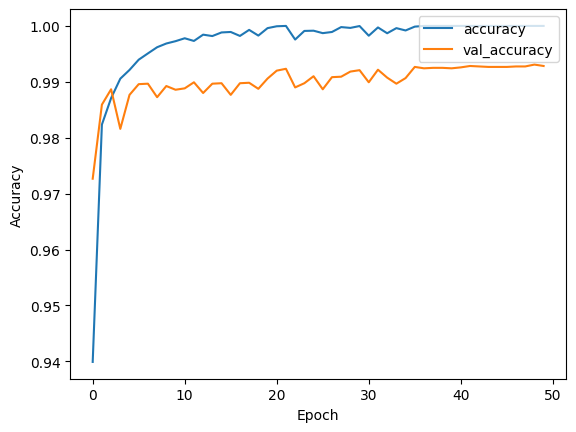

In [5]:
# Evaluate on test data
Y_pred=np.argmax(model.predict(X_test),axis=1)
Y_test_labels=np.argmax(Y_test,axis =1)

# Performance analysis
print(classification_report(Y_test_labels,Y_pred)) #Prints a classification report.
#print(confusion_matrix(Y_test_labels,Y_pred)) #Prints a confusion matrix.
print("Accuracy:",accuracy_score(Y_test_labels,Y_pred)) #Prints the accuracy score.

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy') #Plots the training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='val_accuracy') #Plots the validation accuracy over epochs.
plt.xlabel('Epoch') #Sets the label for the x-axis to 'Epoch'.
plt.ylabel('Accuracy') #Sets the label for the y-axis to 'Accuracy'.
plt.legend(loc='upper right') #Adds a legend to the plot, positioned at the lower right.
plt.show() #Displays the plot.